In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# create bandgap DataFrame
df = {
    "x":np.linspace(0,1,13),
    "HSE43":[2.534, 2.579, 2.608, 2.638, 2.722, 2.696, 2.746, 2.82, 2.857, 2.904, 2.961, 3.028, 3.094]
}

df = pd.DataFrame(df)

# input computed value with different functionals
df.at[0, "prim_HSE43"] = 2.189
df.at[12, "prim_HSE43"] = 2.730
df.at[0, "prim_SOC43"] = 1.195
df.at[12, "prim_SOC43"] = 1.806

# calculate correction of SOC43-HSE43
df["SOC_HSE"] = df.prim_SOC43-df.prim_HSE43
df["SOC_HSE"] = df["SOC_HSE"].interpolate()

# create corrected HSE43
df["HSE43corrected"] = df["HSE43"] + df["SOC_HSE"]

# create corrected bandgap DataFrame and remove error Br4I8
bg = pd.DataFrame({"x": df["x"],
                  "corrected_HSE43": df.HSE43corrected})
bg = bg.drop(index = 4)

#compute fitting coefficient of corrected bandgap
coe_HSE43 = np.polyfit(bg.x, bg.corrected_HSE43, 2)
fit_HSE43 = np.poly1d(coe_HSE43)

# create exp DataFrame
exp = {
    "x": [0,0.1,0.2,0.6,0.7,0.8,0.9,1],
    "bandgap":[1.48,1.56,1.58,1.88,1.95,2.04,2.12,2.23]
}
exp = pd.DataFrame(exp)

# compute fitting coefficient of exp
coe_exp = np.polyfit(exp.x, exp.bandgap, 2)
fit_exp = np.poly1d(coe_exp)

# calculating bandgap bowing parameter b
bg["b_HSE43"] = bg.corrected_HSE43[0] / bg.x + bg.corrected_HSE43[12] / (1-bg.x) - bg.corrected_HSE43 / (bg.x*(1-bg.x))
exp["b"] = exp.bandgap[0] / exp.x + exp.bandgap[7] / (1-exp.x) - exp.bandgap / (exp.x*(1-exp.x))

# compute b mean value
HSE43_mean = bg.b_HSE43.mean()
exp_mean = exp.b.mean()

In [2]:
print("df is",df)
print("bg is", bg)
print("exp is", exp)
print("b_HSE43 mean value is ", HSE43_mean)
print("exp mean value is ", exp_mean)

df is            x  HSE43  prim_HSE43  prim_SOC43   SOC_HSE  HSE43corrected
0   0.000000  2.534       2.189       1.195 -0.994000        1.540000
1   0.083333  2.579         NaN         NaN -0.988167        1.590833
2   0.166667  2.608         NaN         NaN -0.982333        1.625667
3   0.250000  2.638         NaN         NaN -0.976500        1.661500
4   0.333333  2.722         NaN         NaN -0.970667        1.751333
5   0.416667  2.696         NaN         NaN -0.964833        1.731167
6   0.500000  2.746         NaN         NaN -0.959000        1.787000
7   0.583333  2.820         NaN         NaN -0.953167        1.866833
8   0.666667  2.857         NaN         NaN -0.947333        1.909667
9   0.750000  2.904         NaN         NaN -0.941500        1.962500
10  0.833333  2.961         NaN         NaN -0.935667        2.025333
11  0.916667  3.028         NaN         NaN -0.929833        2.098167
12  1.000000  3.094       2.730       1.806 -0.924000        2.170000
bg is         

/tmp/ipykernel_800/2284566315.py:2: MatplotlibDeprecationWarning: Support for unknown constants ('bookitalic') is deprecated since 3.7 and will be removed two minor releases later.
  plt.style.use(["style.mplstyle", overrides])


findfont: Generic family 'sans-serif' not found because none of the following families were found: Whitney Pro, Arial, Helvetica, Catamaran, Liberation Sans, Andale Sans
findfont: Generic family 'sans-serif' not found because none of the following families were found: Whitney Pro, Arial, Helvetica, Catamaran, Liberation Sans, Andale Sans
findfont: Generic family 'sans-serif' not found because none of the following families were found: Whitney Pro, Arial, Helvetica, Catamaran, Liberation Sans, Andale Sans
findfont: Generic family 'sans-serif' not found because none of the following families were found: Whitney Pro, Arial, Helvetica, Catamaran, Liberation Sans, Andale Sans
findfont: Generic family 'sans-serif' not found because none of the following families were found: Whitney Pro, Arial, Helvetica, Catamaran, Liberation Sans, Andale Sans
findfont: Generic family 'sans-serif' not found because none of the following families were found: Whitney Pro, Arial, Helvetica, Catamaran, Liberatio

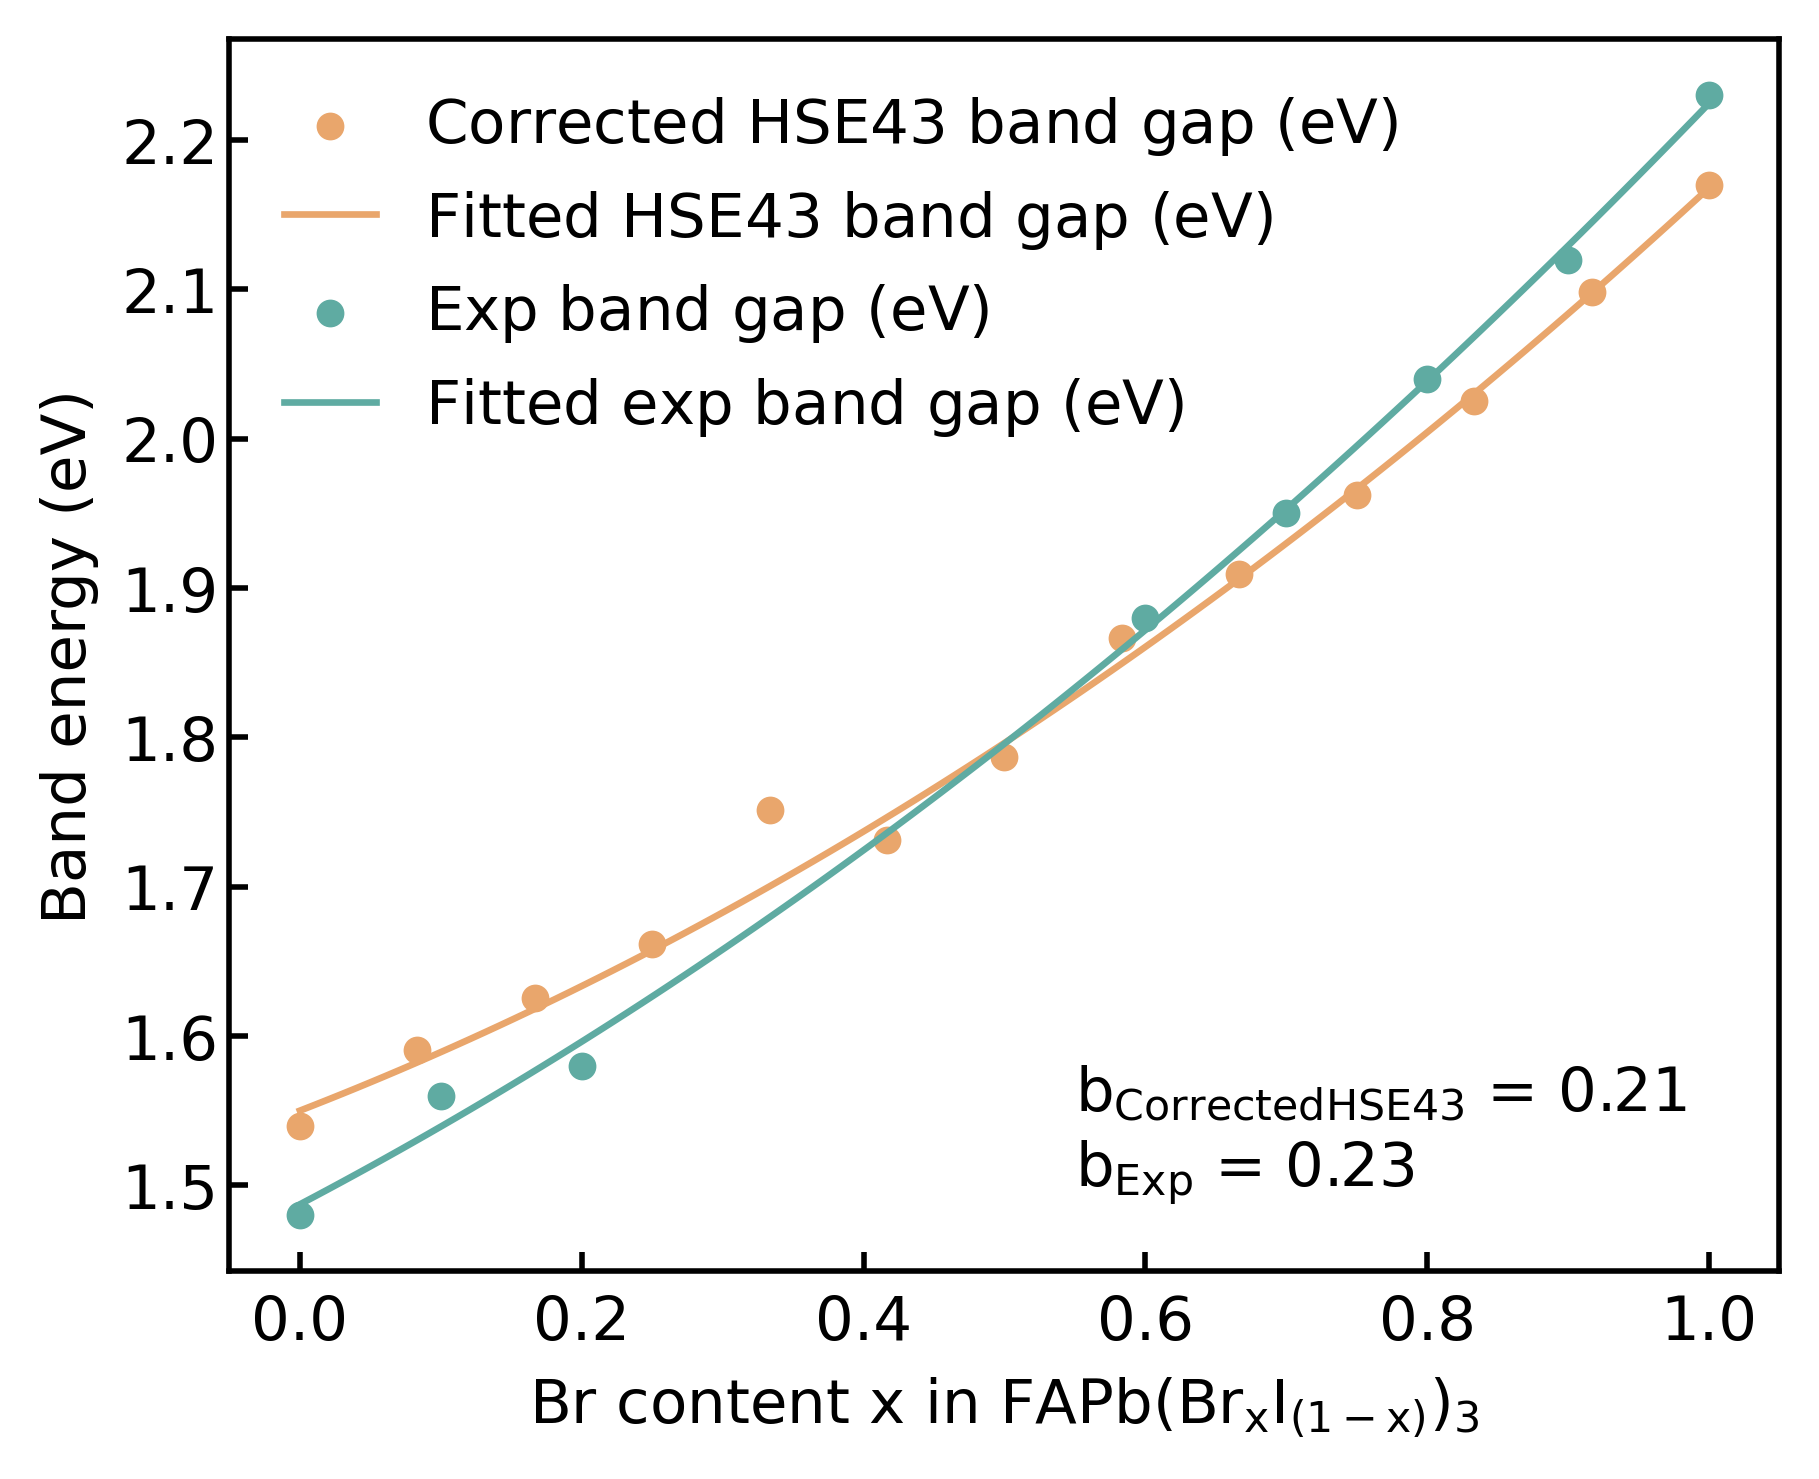

In [3]:
overrides = {"figure.figsize": [5, 4]}
plt.style.use(["style.mplstyle", overrides])
plt.scatter(df.x, df['HSE43corrected'], label = 'Corrected HSE43 band gap ($eV$)')
plt.plot(np.linspace(0,1,100), fit_HSE43(np.linspace(0,1,100)), label = "Fitted HSE43 band gap ($eV$)")
plt.scatter(exp.x, exp.bandgap, label = "Exp band gap ($eV$)")
plt.plot(np.linspace(0,1,100), fit_exp(np.linspace(0,1,100)), label = "Fitted exp band gap ($eV$)")
plt.text(0.55, 1.55, "$b_{Corrected HSE43}$ = 0.21")
plt.text(0.55, 1.5, "$b_{Exp}$ = 0.23")
plt.xlabel("Br content x in FAPb(Br$_x$I$_{(1-x)}$)$_3$")
plt.ylabel("Band energy (eV)")
plt.legend()